## EX0 Machine Learning - Linear Regression

In [8]:
import matplotlib.pyplot as plt
import csv
from scipy import stats
import numpy as np
import sklearn as sl
from sklearn import linear_model

import pandas as pd
from scipy.stats import t
import statsmodels.api as sm
from mpl_toolkits import mplot3d
%matplotlib inline

## Load data using pandas

In [9]:
filename = "/Users/lucaagosti/Desktop/Machine Learning/Esercizi/EX0/Intro_Lab (1)/data/km_year_power_price.csv"
data = pd.read_csv(filename)

print(data)

          km  year  powerPS  avgPrice
0     125000  2001       40   1371.11
1     150000  2001       40   1298.70
2       5000  2001       60   1232.43
3      50000  2001       60   1733.89
4      60000  2001       60   1985.24
...      ...   ...      ...       ...
1292    5000  2015      260  45277.18
1293   10000  2015      260  54156.28
1294   20000  2015      260  49492.38
1295   10000  2015      300  38542.69
1296   20000  2015      300  39683.32

[1297 rows x 4 columns]


## Linear Regression 1D

km Vs avgPrice


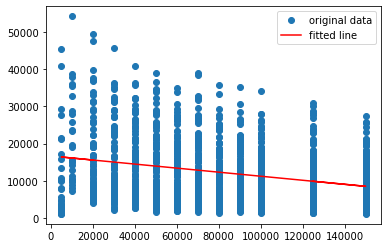

slope (95%): -0.054252 +/- nan
intercept (95%): 16692.345303 +/- nan

year Vs avgPrice


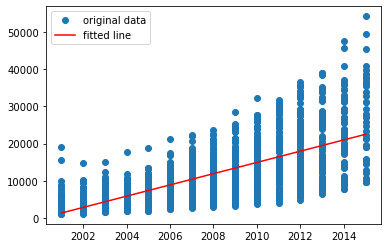

slope (95%): 1509.093825 +/- 196.312024
intercept (95%): -3018309.484957 +/- 394243.872844

powerPS Vs avgPrice


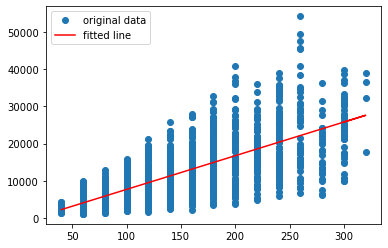

slope (95%): 90.330807 +/- 6.426252
intercept (95%): -1303.912699 +/- 1063.994422

Correlation Table
                km      year   powerPS  avgPrice
km        1.000000 -0.386738  0.173047 -0.257287
year     -0.386738  1.000000  0.130686  0.676704
powerPS   0.173047  0.130686  1.000000  0.708550
avgPrice -0.257287  0.676704  0.708550  1.000000


In [10]:
tinv = lambda p, df: abs(t.ppf(p/2, df))

for column in data.columns[:-1]:
    print(column, "Vs avgPrice")
    res = stats.linregress(data.loc[:,column], data.loc[:,"avgPrice"])
    plt.plot(data.loc[:,column], data.loc[:,"avgPrice"], 'o', label='original data')
    plt.plot(data.loc[:,column], res.intercept + res.slope*data.loc[:,column], 'r', label='fitted line')
    plt.legend()
    plt.show()
    ts = tinv(0.05, len(column)-2)
    print(f"slope (95%): {res.slope:.6f} +/- {ts*res.stderr:.6f}")
    print(f"intercept (95%): {res.intercept:.6f}"f" +/- {ts*res.intercept_stderr:.6f}")
    print()

print("Correlation Table")
print(data.corr())

## Linear Regression in 2D

( km , year ) Vs avgPrice

( km , powerPS ) Vs avgPrice

( year , powerPS ) Vs avgPrice



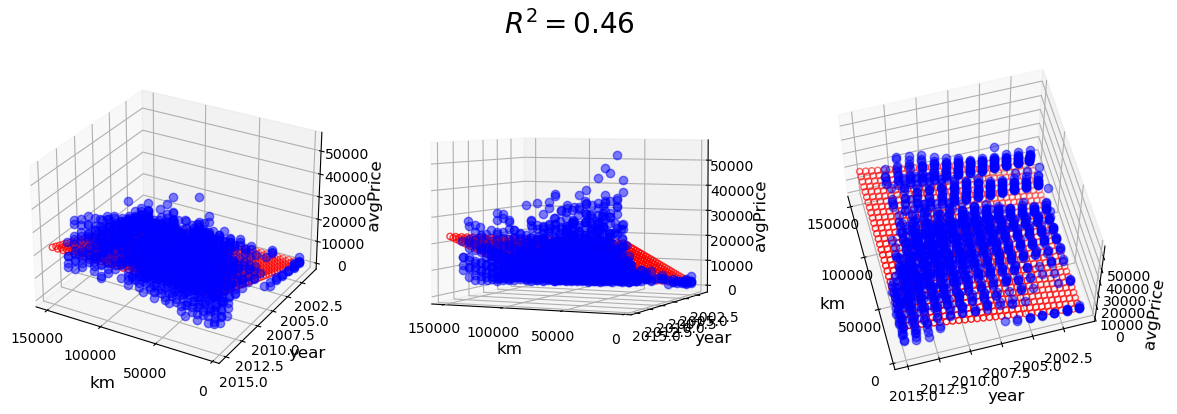

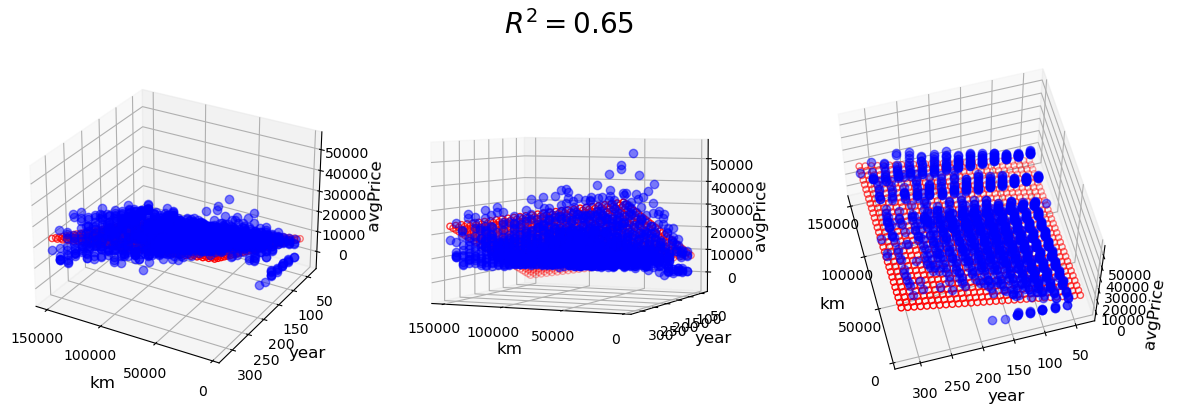

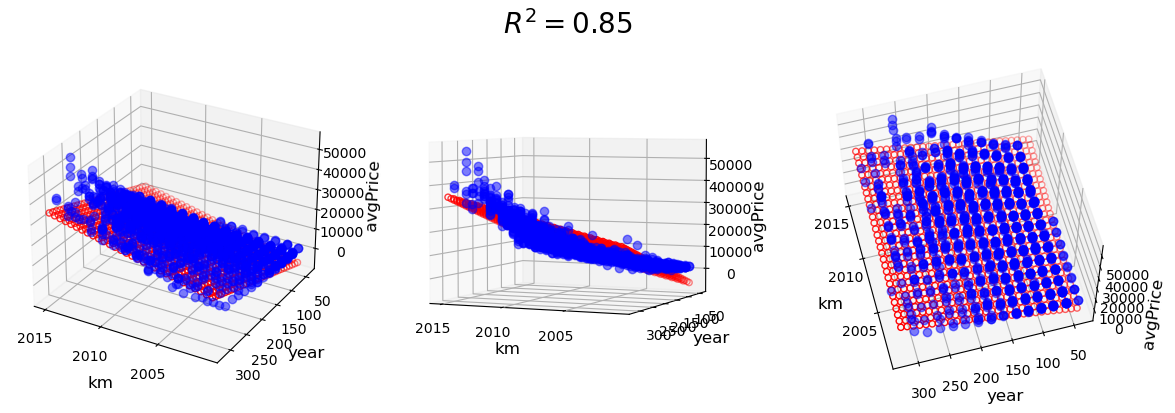

In [13]:
pair = [data[["km","year"]], data[["km","powerPS"]], data[["year","powerPS"]]]
Y = data["avgPrice"]

for X in pair:
    print("(",X.columns[0],",",X.columns[1],")", "Vs avgPrice")
    x = X.iloc[:, 0]
    y = X.iloc[:, 1]
    z = Y
    x_pred = np.linspace(min(X.iloc[:,0]), max(X.iloc[:,0]), 30)
    y_pred = np.linspace(min(X.iloc[:,1]), max(X.iloc[:,1]), 30)
    xx_pred, yy_pred = np.meshgrid(x_pred, y_pred)
    model_viz = np.array([xx_pred.flatten(), yy_pred.flatten()]).T

    ################################################ Train #############################################

    ols = linear_model.LinearRegression()
    model = ols.fit(X, Y)
    predicted = model.predict(model_viz)

    ############################################## Evaluate ############################################

    r2 = model.score(X, Y)

    ############################################## Plot ################################################

    plt.style.use('default')

    fig = plt.figure(figsize=(12, 4))

    ax1 = fig.add_subplot(131, projection='3d')
    ax2 = fig.add_subplot(132, projection='3d')
    ax3 = fig.add_subplot(133, projection='3d')

    axes = [ax1, ax2, ax3]

    for ax in axes:
        ax.plot(x, y, z, color='b', zorder=15, linestyle='none', marker='o', alpha=0.5)
        ax.scatter(xx_pred.flatten(), yy_pred.flatten(), predicted, facecolor=(0,0,0,0), s=20, edgecolor='red')
        ax.set_xlabel('km', fontsize=12)
        ax.set_ylabel('year', fontsize=12)
        ax.set_zlabel('avgPrice', fontsize=12)
        ax.locator_params(nbins=4, axis='x')
        ax.locator_params(nbins=5, axis='x')

    ax1.view_init(elev=28, azim=120)
    ax2.view_init(elev=4, azim=114)
    ax3.view_init(elev=60, azim=165)

    fig.suptitle('$R^2 = %.2f$' % r2, fontsize=20)

    fig.tight_layout()
    
    print()

## Linear Regression in 3D

In [12]:
x = data[["km","year","powerPS"]]
y = data["avgPrice"]

regr = linear_model.LinearRegression()
regr.fit(x, y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

Intercept: 
 -2340308.9761488754
Coefficients: 
 [-3.60337962e-02  1.16651573e+03  8.53858073e+01]
